In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)


c:\Users\Admin\Data\WDM-AI-TEMIS


In [2]:
from configs.config import *
from libs.common import *
# from utils.mongodb_connection import *
from utils.format_utils import *
from utils.extract_tables import full_pipeline
load_dotenv(find_dotenv())

c:/Users/Admin/Data/WDM-AI-TEMIS
root_dir: c:/Users/Admin/Data/WDM-AI-TEMIS
c:/Users/Admin/Data/WDM-AI-TEMIS/data


c:\Users\Admin\Data\WDM-AI-TEMIS\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-07 01:08:13.605 | WARNING  | fastembed.embedding:<module>:7 - DefaultEmbedding, FlagEmbedding, JinaEmbedding are deprecated.Use from fastembed import TextEmbedding instead.


True

In [3]:
mongo_uri = os.getenv('MONGO_URI')
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
QUOTIENTAI = os.getenv('QuotientAI')
collection = "kyanon_digital"

# mongo_client = get_mongo_client(mongo_uri)
# db = mongo_client['Kyanon']
# collection = db['RAG']
collection_name = "kyanon_digital"
QUOTIENT_API_KEY = os.getenv('QUOTIENT_API_KEY')

In [4]:
exps_dir

'c:/Users/Admin/Data/WDM-AI-TEMIS/exps'

In [5]:
##Uncomment to initialise qdrant client in memory
# client.close()
client = qdrant_client.QdrantClient(
   path=f"{exps_dir}/qdrant_client_memory",
)

# ##Uncomment below to connect to Qdrant Cloud
# client = qdrant_client.QdrantClient(
#     os.environ.get("QDRANT_URL"),
#     api_key=os.environ.get("QDRANT_API_KEY"),
# )

## Uncomment below to connect to local Qdrant
#client = qdrant_client.QdrantClient("http://localhost:6333")

In [6]:
from fastembed.embedding import TextEmbedding

data=pd.DataFrame(TextEmbedding.list_supported_models())
data

model  \
0                                    BAAI/bge-base-en   
1                               BAAI/bge-base-en-v1.5   
2                              BAAI/bge-large-en-v1.5   
3                                   BAAI/bge-small-en   
4                              BAAI/bge-small-en-v1.5   
5                              BAAI/bge-small-zh-v1.5   
6                  mixedbread-ai/mxbai-embed-large-v1   
7                 snowflake/snowflake-arctic-embed-xs   
8                  snowflake/snowflake-arctic-embed-s   
9                  snowflake/snowflake-arctic-embed-m   
10            snowflake/snowflake-arctic-embed-m-long   
11                 snowflake/snowflake-arctic-embed-l   
12                                jinaai/jina-clip-v1   
13                          Qdrant/clip-ViT-B-32-text   
14             sentence-transformers/all-MiniLM-L6-v2   
15                  jinaai/jina-embeddings-v2-base-en   
16                 jinaai/jina-embeddings-v2-small-en   
17                  jinaai/jina-embeddings-v2-base-de   
18                jinaai/jina-embeddings-v2-base-code   
19                  jinaai/jina-embeddings-v2-base-zh   
20                  jinaai/jina-embeddings-v2-base-es   
21                                  thenlper/gte-base   
22                                 thenlper/gte-large   
23                     nomic-ai/nomic-embed-text-v1.5   
24                   nomic-ai/nomic-embed-text-v1.5-Q   
25                       nomic-ai/nomic-embed-text-v1   
26  sentence-transformers/paraphrase-multilingual-...   
27  sentence-transformers/paraphrase-multilingual-...   
28                     intfloat/multilingual-e5-large   
29                          jinaai/jina-embeddings-v3   

                                              sources  \
0   {'hf': 'Qdrant/fast-bge-base-en', 'url': 'http...   
1   {'hf': 'qdrant/bge-base-en-v1.5-onnx-q', 'url'...   
2   {'hf': 'qdrant/bge-large-en-v1.5-onnx', 'url':...   
3   {'hf': 'Qdrant/bge-small-en', 'url': 'https://...   
4   {'hf': 'qdrant/bge-small-en-v1.5-onnx-q', 'url...   
5   {'hf': 'Qdrant/bge-small-zh-v1.5', 'url': 'htt...   
6   {'hf': 'mixedbread-ai/mxbai-embed-large-v1', '...   
7   {'hf': 'snowflake/snowflake-arctic-embed-xs', ...   
8   {'hf': 'snowflake/snowflake-arctic-embed-s', '...   
9   {'hf': 'Snowflake/snowflake-arctic-embed-m', '...   
10  {'hf': 'snowflake/snowflake-arctic-embed-m-lon...   
11  {'hf': 'snowflake/snowflake-arctic-embed-l', '...   
12  {'hf': 'jinaai/jina-clip-v1', 'url': None, '_d...   
13  {'hf': 'Qdrant/clip-ViT-B-32-text', 'url': Non...   
14  {'hf': 'qdrant/all-MiniLM-L6-v2-onnx', 'url': ...   
15  {'hf': 'xenova/jina-embeddings-v2-base-en', 'u...   
16  {'hf': 'xenova/jina-embeddings-v2-small-en', '...   
17  {'hf': 'jinaai/jina-embeddings-v2-base-de', 'u...   
18  {'hf': 'jinaai/jina-embeddings-v2-base-code', ...   
19  {'hf': 'jinaai/jina-embeddings-v2-base-zh', 'u...   
20  {'hf': 'jinaai/jina-embeddings-v2-base-es', 'u...   
21  {'hf': 'thenlper/gte-base', 'url': None, '_dep...   
22  {'hf': 'qdrant/gte-large-onnx', 'url': None, '...   
23  {'hf': 'nomic-ai/nomic-embed-text-v1.5', 'url'...   
24  {'hf': 'nomic-ai/nomic-embed-text-v1.5', 'url'...   
25  {'hf': 'nomic-ai/nomic-embed-text-v1', 'url': ...   
26  {'hf': 'qdrant/paraphrase-multilingual-MiniLM-...   
27  {'hf': 'xenova/paraphrase-multilingual-mpnet-b...   
28  {'hf': 'qdrant/multilingual-e5-large-onnx', 'u...   
29  {'hf': 'jinaai/jina-embeddings-v3', 'url': Non...   

                   model_file  \
0        model_optimized.onnx   
1        model_optimized.onnx   
2                  model.onnx   
3        model_optimized.onnx   
4        model_optimized.onnx   
5        model_optimized.onnx   
6             onnx/model.onnx   
7             onnx/model.onnx   
8             onnx/model.onnx   
9             onnx/model.onnx   
10            onnx/model.onnx   
11            onnx/model.onnx   
12       onnx/text_model.onnx   
13                 model.onnx   
14               

In [7]:
data.model.unique()

array(['BAAI/bge-base-en', 'BAAI/bge-base-en-v1.5',
       'BAAI/bge-large-en-v1.5', 'BAAI/bge-small-en',
       'BAAI/bge-small-en-v1.5', 'BAAI/bge-small-zh-v1.5',
       'mixedbread-ai/mxbai-embed-large-v1',
       'snowflake/snowflake-arctic-embed-xs',
       'snowflake/snowflake-arctic-embed-s',
       'snowflake/snowflake-arctic-embed-m',
       'snowflake/snowflake-arctic-embed-m-long',
       'snowflake/snowflake-arctic-embed-l', 'jinaai/jina-clip-v1',
       'Qdrant/clip-ViT-B-32-text',
       'sentence-transformers/all-MiniLM-L6-v2',
       'jinaai/jina-embeddings-v2-base-en',
       'jinaai/jina-embeddings-v2-small-en',
       'jinaai/jina-embeddings-v2-base-de',
       'jinaai/jina-embeddings-v2-base-code',
       'jinaai/jina-embeddings-v2-base-zh',
       'jinaai/jina-embeddings-v2-base-es', 'thenlper/gte-base',
       'thenlper/gte-large', 'nomic-ai/nomic-embed-text-v1.5',
       'nomic-ai/nomic-embed-text-v1.5-Q', 'nomic-ai/nomic-embed-text-v1',
       'sentence-transfor

In [8]:
# client.create_collection(
#     collection_name='kyanon_digital',
#     vectors_config=VectorParams(size=768, distance=Distance.COSINE),
# )
client.get_collections()


CollectionsResponse(collections=[CollectionDescription(name='experiment_512_128_gte-base')])

In [9]:
# info = client.get_collection(collection_name="experiment_512_128_gte-base")
# print(info)

In [10]:
import requests
import json

def summary_fn(prompt):
    """
    Gửi prompt đến Ollama và nhận về một đoạn phản hồi hoàn chỉnh.
    
    Tham số:
        prompt (str): Câu hỏi hoặc yêu cầu bạn muốn gửi đến mô hình.

    Trả về:
        str: Phản hồi hoàn chỉnh từ mô hình.
    """
    response = requests.post(
  url="https://openrouter.ai/api/v1/chat/completions",
  headers={
    "Authorization": f"Bearer {os.getenv('API_OPENROUTE')}",
    "Content-Type": "application/json",
  },
  data=json.dumps({
    "model": "mistralai/devstral-small:free",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": f"""
    You are given a single table fragment extracted from a PDF document using OCR. This fragment may be part of a larger table that was split across multiple pages due to formatting or page layout.
    Your task is to generate a detailed and comprehensive summary of the content in this table fragment.
    The summary should clearly describe:
        The main subject or topic of the table
        Key columns and their meanings
        Important patterns, trends, or observations in the data
        Any notable values or anomalies
        Contextual information needed to understand the data
    Write the summary in 1–3 full sentences , using clear and precise language.
    If applicable, mention that this fragment appears to be part of a larger table, and include any inferred continuity from the data.
    {prompt}
"""
          }
        ]
      }
    ],
    
  })
)

    return response.json().get("choices", [{}])[0].get("message", {}).get("content", "")

In [11]:
# import requests
# import json

# def summary_fn(prompt):
#     """
#     Gửi prompt đến Ollama và nhận về một đoạn phản hồi hoàn chỉnh.
    
#     Tham số:
#         prompt (str): Câu hỏi hoặc yêu cầu bạn muốn gửi đến mô hình.

#     Trả về:
#         str: Phản hồi hoàn chỉnh từ mô hình.
#     """
#     full_response = ""
#     context = f"""
#     You are given a single table fragment extracted from a PDF document using OCR. This fragment may be part of a larger table that was split across multiple pages due to formatting or page layout.
#     Your task is to generate a detailed and comprehensive summary of the content in this table fragment.
#     The summary should clearly describe:
#         The main subject or topic of the table
#         Key columns and their meanings
#         Important patterns, trends, or observations in the data
#         Any notable values or anomalies
#         Contextual information needed to understand the data
#     Write the summary in 1–3 full sentences , using clear and precise language.
#     If applicable, mention that this fragment appears to be part of a larger table, and include any inferred continuity from the data.
#     {prompt}
#     """
#     url = "http://localhost:11434/api/generate"
#     payload = {
#         "model": "gemma:latest",
#         "prompt": context,
#         "stream": True
#     }

#     with requests.post(url, json=payload, stream=True) as response:
#         for line in response.iter_lines():
#             if line:
#                 try:
#                     data = json.loads(line)
#                     if 'response' in data:
#                         chunk = data['response']
#                         full_response += chunk
#                     if data.get('done', False):
#                         break
#                 except json.JSONDecodeError:
#                     continue  

#     return full_response.strip()

In [12]:
def extract_all_table(folder_path, output_json_filename="./final_tables.json"):
    all_results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            pdf_path = os.path.join(folder_path, filename)
            json_result = full_pipeline(source_path=pdf_path, verbose=1)

            for key, value_list in json_result.items():
                if key not in all_results:
                    all_results[key] = []
                all_results[key].extend(value_list) 

    try:
        output_path = os.path.join(folder_path, output_json_filename)
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(all_results, f, ensure_ascii=False, indent=4)
        print(f"✅ Đã lưu toàn bộ kết quả vào: {output_json_filename}")
    except Exception as e:
        print(f"[LỖI] Không thể ghi file JSON tổng hợp: {e}")

    return all_results

In [13]:
# table_results = extract_all_table(folder_path=f"{data_dir}/pdf/")

In [14]:
# table_results

In [15]:
def summarize_table():
    tables = []
    tables_sources = json.load(open(f"{data_dir}/QA_tables/pdf/final_tables.json", 'r', encoding='utf-8'))
    sources = list(tables_sources.keys())
    for source in sources:
        for table in tables_sources[source]:
            table_document = LangchainDocument(
                # summary =summary_fn(table['table_content']),
                page_content=table['table_content'],
                metadata={
                    "source": source,
                    "page_numbers": table['page_numbers'],
                    "is_table": True,
                    "source_table_idx": table['table_idx']
                }
            )
            tables.append(table_document)
    return tables

In [16]:
import pymupdf
def get_detail_chunks(pdf_path):
    doc = pymupdf.open(pdf_path)
    source = os.path.splitext(os.path.basename(pdf_path))[0]

    page_documents = []
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text = page.get_text().strip()
        if not text:
            continue

        page_document = LangchainDocument(
            page_content=text,
            metadata={
                "source": source,
                "page_numbers": [page_num + 1], 
                "is_table": False
            }
        )
        page_documents.append(page_document)

    doc.close()
    return page_documents

In [17]:
def process_all_pdfs_in_folder(folder_path):
    all_page_documents = []
    all_table_documents = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            pdf_path = os.path.join(folder_path, filename)
            print(f"\n>>> Đang xử lý: {pdf_path}")
            page_docs = get_detail_chunks(pdf_path)
            all_page_documents.extend(page_docs)
            table_docs = summarize_table()
            all_table_documents.extend(table_docs)

    return all_page_documents, all_table_documents

In [18]:
data_dir

'c:/Users/Admin/Data/WDM-AI-TEMIS/data'

In [19]:
all_page_documents, all_table_documents =process_all_pdfs_in_folder(f"{data_dir}/QA_tables/pdf/")
all_page_documents, all_table_documents


>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TEMIS/data/QA_tables/pdf/0c92f65db928c431023f59603039aa1e.pdf

>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TEMIS/data/QA_tables/pdf/0ed7f2ecfd607a42c745b0889e500ecf.pdf

>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TEMIS/data/QA_tables/pdf/0f2eac764c8d04d8d13d8a999342d106.pdf

>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TEMIS/data/QA_tables/pdf/2c98e99a08ec5392d50e60370d871319.pdf

>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TEMIS/data/QA_tables/pdf/2d64938a8d3e12dbb709f760ecd53e14.pdf

>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TEMIS/data/QA_tables/pdf/2e1b34aa28e718f66bfe600045ed7387.pdf

>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TEMIS/data/QA_tables/pdf/3e8e568ec576f0189cee0b6032720054.pdf

>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TEMIS/data/QA_tables/pdf/4bd9336ffdb1593d71a919b7e7d68995.pdf

>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TEMIS/data/QA_tables/pdf/4f37fc393094547bbbe030cecedf9a3b.pdf

>>> Đang xử lý: c:/Users/Admin/Data/WDM-AI-TE

([Document(metadata={'source': '0c92f65db928c431023f59603039aa1e', 'page_numbers': [1], 'is_table': False}, page_content="Academy Award for Best Actress\n61 languages\nArticle\nTalk\nRead\nEdit\nView history\nTools\nAcademy Award for Best Actress\nThe 2025 recipient: Mikey Madison\nAwarded for\nBest Performance by an\nActress in a Leading Role\nCountry\nUnited States\nPresented by\nAcademy of Motion Picture\nArts and Sciences (AMPAS)\nFirst award\nMay\xa016, 1929; 95 years ago\n(for films released during the\n1927/1928 film season)\nMost recent\nwinner\nMikey Madison, Anora (2024)\nMost awards\nKatharine Hepburn (4)\nMost\nnominations\nMeryl Streep (17)\nWebsite\noscars.org\nFrom Wikipedia, the free encyclopedia\nThe Academy Award for Best Actress is an award\npresented annually by the Academy of Motion Picture Arts and\nSciences (AMPAS). It has been awarded since the 1st\nAcademy Awards to an actress who has delivered an\noutstanding performance in a leading role in a film released\nt

In [20]:
def add_documents(client, collection_name, documents, tables, chunk_size, chunk_overlap, embedding_model_name):
    """
    This function adds documents to the desired Qdrant collection given the specified RAG parameters.
    """

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        add_start_index=True,
        separators=["\n\n", "\n", ".", " ", ""],
    )

    docs_processed = []
    for doc in documents:
        docs_processed += text_splitter.split_documents([doc])
    for doc in tables:
        docs_processed.append(doc)

    docs_contents = []
    docs_metadatas = []

    for doc in docs_processed:
        if hasattr(doc, 'page_content') and hasattr(doc, 'metadata'):
            docs_contents.append(doc.page_content)
            docs_metadatas.append(doc.metadata)
        else:
            print("Warning: Some documents do not have 'page_content' or 'metadata' attributes.")
            print(doc)

    client.set_model(embedding_model_name=embedding_model_name)
    client.add(collection_name=collection_name, metadata=docs_metadatas, documents=docs_contents)


def get_documents(collection_name, query, embedding_model, num_documents=5):
    """
    This function retrieves the desired number of documents from the Qdrant collection given a query.
    It returns a list of the retrieved documents.
    """
    client.set_model(embedding_model_name=embedding_model)
    search_results = client.query(
        collection_name=collection_name,
        query_text=query,
        limit=num_documents,
    )
    results = [r.metadata['document'] for r in search_results]
    return results

## Evaluation

In [21]:
# from quotientai import QuotientAI
# quotient = QuotientAI(api_key=QUOTIENTAI)

In [22]:
import json

with open(f"{data_dir}/QA_tables/generated_qa_pairs_final.json", "r", encoding="utf-8") as f:
    eval_data = json.load(f)

eval_df = pd.DataFrame(eval_data)
eval_df.head()



id                            source page_numbers  table_idx  \
0  qa_1_001  4f37fc393094547bbbe030cecedf9a3b       [4, 5]          0   
1  qa_1_002  4f37fc393094547bbbe030cecedf9a3b       [4, 5]          0   
2  qa_1_003  4f37fc393094547bbbe030cecedf9a3b       [4, 5]          0   
3  qa_1_004  4f37fc393094547bbbe030cecedf9a3b       [4, 5]          0   
4  qa_1_005  4f37fc393094547bbbe030cecedf9a3b       [4, 5]          0   

                                            question  \
0  What roles did the actor play in The Little Me...   
1  What movie released in 1992 featured Barbie (v...   
2  In 1994, what role did the actor play in the m...   
3  What role did the actor play in Mickey's Fun S...   
4  What role did the actor play in Enchanted, rel...   

                       answer  \
0              Ariel, Vanessa   
1  Dance! Workout with Barbie   
2                  Thumbelina   
3               Ariel (voice)   
4                         Sam   

                                             context  
0  # 4f37fc393094547bbbe030cecedf9a3b_table_0\n##...  
1  # 4f37fc393094547bbbe030cecedf9a3b_table_0\n##...  
2  # 4f37fc393094547bbbe030cecedf9a3b_table_0\n##...  
3  # 4f37fc393094547bbbe030cecedf9a3b_table_0\n##...  
4  # 4f37fc393094547bbbe030cecedf9a3b_table_0\n##...

In [23]:
len(eval_df)

725

In [24]:
from langchain_google_vertexai import ChatVertexAI

In [25]:
from google.oauth2 import service_account

credentials_path = "C:/Users/Admin/Data/multimodal-rag-baseline/gdsc2025-74596a254ab4.json"

credentials = service_account.Credentials.from_service_account_file(credentials_path)

In [26]:
structured_llm = ChatVertexAI(model="gemini-2.0-flash", temperature=0)


In [27]:
import time
def generate_model_output(user_query, documents):
    gemini_prompt = PromptTemplate.from_template(
            f"""
        You are an assistant that can answer questions based on the content of documents and filter information to give the best answer.
        Here are some document fragments retrieved from a PDF document:
        {documents}
        Based on the content of the documents, please answer the following question in no more than 1-2 sentences with the most relevant and concise answer:
        {user_query}
        """
        )
    return ""

In [28]:
# generate_model_output('xin chào', 'hello')

In [29]:
def is_in_top_k(retrieved_docs, ground_truth_docs, top_k=5):
    """Kiểm tra xem có ít nhất một ground truth context nằm trong top-k retrieved docs không."""
    for doc in retrieved_docs[:top_k]:
        for gt_doc in ground_truth_docs:
            if doc.strip() == gt_doc.strip():
                return True
    return False


def calculate_hit_rate(df, retrieved_col='retrieved_contexts', ground_truth_col='reference_contexts', top_k=5):
    """Tính Hit Rate @ K"""
    df['hit'] = df.apply(
        lambda row: is_in_top_k(row[retrieved_col], row[ground_truth_col], top_k),
        axis=1
    )
    return df['hit'].mean()


def reciprocal_rank(retrieved_docs, ground_truth_docs):
    """Tính Reciprocal Rank (1/rank) nếu có bất kỳ ground truth nào xuất hiện."""
    for i, doc in enumerate(retrieved_docs):
        for gt_doc in ground_truth_docs:
            if doc.strip() == gt_doc.strip():
                return 1.0 / (i + 1)
    return 0.0


def calculate_mrr(df, retrieved_col='retrieved_contexts', ground_truth_col='reference_contexts'):
    """Tính Mean Reciprocal Rank (MRR)"""
    df['rr'] = df.apply(
        lambda row: reciprocal_rank(row[retrieved_col], row[ground_truth_col]),
        axis=1
    )
    return df['rr'].mean()


In [30]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')
evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4o-mini"))

In [31]:
import pandas as pd
from datasets import Dataset
from ragas.evaluation import evaluate, RunConfig
from ragas.metrics import (
    NonLLMContextRecall,
    NonLLMContextPrecisionWithReference,
)

def run_ragas_eval(
    eval_df,
    collection_name,
    doc_retrieval_function,
    embedding_model_name,
    num_docs=5,
    path="ragas_eval.csv"
):
    eval_df = eval_df.rename(columns={"question": "input", "answer": "ground_truth", "context": "reference_contexts"})
    print("Running Context Retrieve...")

    eval_df['contexts'] = eval_df['input'].apply(
        lambda q: doc_retrieval_function(collection_name, q, embedding_model_name, num_documents=num_docs)
    )
    eval_df["reference_contexts"] = eval_df["reference_contexts"].apply(lambda x: [x] if isinstance(x, str) else x)


    print("Running Oputput Generate...")

    if 'output' not in eval_df.columns:
        eval_df['output'] = eval_df.apply(
            lambda row: generate_model_output(row['input'], row['contexts']),
            axis=1
        )

    eval_df = eval_df.rename(columns={
        "input": "user_input",     
        "output": "response",        
        "ground_truth": "ground_truth",  
        "contexts": "retrieved_contexts"
    })
    dataset = Dataset.from_pandas(eval_df[["user_input", "response", "ground_truth", "retrieved_contexts", "reference_contexts"]])
    context_precision =NonLLMContextPrecisionWithReference()
    context_recall = NonLLMContextRecall()



    print("Running RAGAS evaluation...")
    run_config = RunConfig(timeout=120, max_workers=63)

    results = evaluate(
        dataset,
        metrics=[
            context_precision,
            context_recall
        ]
    )

    df_results = results.to_pandas()
    df_results['hit_rate'] = calculate_hit_rate(eval_df)
    df_results['mrr'] = calculate_mrr(eval_df)
    df_results = df_results.rename(columns={
        "non_llm_context_precision_with_reference": "context_precision",     
        "non_llm_context_recall": "context_recall"
    })
    df_results.to_csv(path, index=False)

    print("Evaluation completed. Results saved to", path)
    return df_results


In [32]:
from ragas.evaluation import Dataset
from ragas.evaluation import evaluate


In [33]:
from matplotlib import pyplot as plt
import pandas as pd
def plot_experiment_comparison(experiment_results_list, experiment_names, metrics_to_plot):
    """
    experiment_results_list: list các DataFrame kết quả đánh giá từ run_ragas_eval
    experiment_names: list tên experiment tương ứng
    metrics_to_plot: list các tên metric cần vẽ
    
    Hàm sẽ tạo DataFrame trung bình các metric theo experiment và vẽ biểu đồ so sánh.
    """
    stats = []
    for name, df in zip(experiment_names, experiment_results_list):
        means = df[metrics_to_plot].mean().tolist()
        stats.append([name] + means)

    stats_df = pd.DataFrame(stats, columns=['Experiment'] + metrics_to_plot)
    stats_df = stats_df.set_index('Experiment').T 
    standard_metrics = ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall',
                        'context_relevancy', 'answer_similarity', 'answer_correctness']
    
    special_metrics = {
        'hit_rate': 'Hit Rate',
        'mrr': 'MRR'
    }
    has_special_metric = any(metric in special_metrics for metric in metrics_to_plot)
    is_all_standard = all(metric in standard_metrics for metric in metrics_to_plot)

    if has_special_metric and not is_all_standard:
        title = "Comparison of Retrieval & RAG Metrics"
        ylabel = "Score / Value"
        ylim = None  
    else:
        title = "Comparison of RAGAS Evaluation Metrics"
        ylabel = "Average Score"
        ylim = (0, 1)

    ax = stats_df.plot(
        kind='bar',
        figsize=(12, 10),
        ylim=ylim,
        width=0.7,
        edgecolor='white',
        linewidth=2,
        colormap='tab10',
        title=title,
        ylabel=ylabel
    )
    ax.set_xlabel("Metric")
    # ax.set_ylabel("Average Score")
    ax.legend(title="Experiment", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

    for container in ax.containers:
        ax.bar_label(container, fmt="%.3f", rotation=90)

    plt.tight_layout()
    plt.show()

In [34]:
from huggingface_hub import login

api_token = os.getenv('HUGGINGE_FACE_TOKEN') 
login(api_token)


## Experiment

### **Experiment 1:**

We will be starting off with the following specifications:
- **Embeddings: `bge-small-en`**
- **Chunk size: `512`**
- **Chunk overlap: `64`**
- **Number of docs: `3`**
- **Language model: `Mistral-7B-Instruct`**

In [35]:
chunk_size = 512
chunk_overlap = 128
embedding_model_name = "thenlper/gte-base"
num_docs = 3

COLLECTION_NAME = f"experiment_{chunk_size}_{chunk_overlap}_{embedding_model_name.split('/')[1]}"

add_documents(client,
              collection_name=COLLECTION_NAME,
              documents=all_page_documents,
              tables=all_table_documents,
              chunk_size=chunk_size,
              chunk_overlap=chunk_overlap,
              embedding_model_name=embedding_model_name)


In [36]:
# exp1 = pd.read_csv(f"{exps_dir}/experiment_512_64_gte-base.csv")

In [37]:
# chunk_size = 512
# chunk_overlap = 128
# embedding_model_name = "thenlper/gte-base"
# num_docs = 3

# COLLECTION_NAME = f"experiment_{chunk_size}_{chunk_overlap}_{embedding_model_name.split('/')[1]}"

In [38]:
experiment_1 = run_ragas_eval(eval_df,
                        collection_name=COLLECTION_NAME,
                        doc_retrieval_function=get_documents,
                        num_docs=num_docs,
                        embedding_model_name=embedding_model_name,
                        path=f"{COLLECTION_NAME}_{num_docs}_gemma.csv")


Running Context Retrieve...
Running Oputput Generate...
Running RAGAS evaluation...


Evaluating: 100%|██████████| 1450/1450 [00:00<00:00, 2171.56it/s]


Evaluation completed. Results saved to experiment_512_128_gte-base_3_gemma.csv


In [39]:
chunk_size = 512
chunk_overlap = 128
embedding_model_name = "BAAI/bge-base-en"
num_docs = 3

COLLECTION_NAME = f"experiment_{chunk_size}_{chunk_overlap}_{embedding_model_name.split('/')[1]}"

add_documents(client,
              collection_name=COLLECTION_NAME,
              documents=all_page_documents,
              tables=all_table_documents,
              chunk_size=chunk_size,
              chunk_overlap=chunk_overlap,
              embedding_model_name=embedding_model_name)


In [40]:
# Now we can kick off an evaluation job
experiment_2 = run_ragas_eval(eval_df,
                        collection_name=COLLECTION_NAME,
                        doc_retrieval_function=get_documents,
                        num_docs=num_docs,
                        embedding_model_name=embedding_model_name,
                        path=f"{COLLECTION_NAME}_{num_docs}_gemma.csv")


Running Context Retrieve...
Running Oputput Generate...
Running RAGAS evaluation...


Evaluating: 100%|██████████| 1450/1450 [00:00<00:00, 1827.86it/s]


Evaluation completed. Results saved to experiment_512_128_bge-base-en_3_gemma.csv


In [ ]:
chunk_size = 512
chunk_overlap = 128
embedding_model_name = "jinaai/jina-embeddings-v2-base-en"
num_docs = 3

COLLECTION_NAME = f"experiment_{chunk_size}_{chunk_overlap}_{embedding_model_name.split('/')[1]}"

add_documents(client,
              collection_name=COLLECTION_NAME,
              documents=all_page_documents,
              tables=all_table_documents,
              chunk_size=chunk_size,
              chunk_overlap=chunk_overlap,
              embedding_model_name=embedding_model_name)


In [ ]:
experiment_3 = run_ragas_eval(eval_df,
                        collection_name=COLLECTION_NAME,
                        doc_retrieval_function=get_documents,
                        num_docs=num_docs,
                        embedding_model_name=embedding_model_name,
                        path=f"{COLLECTION_NAME}_{num_docs}_gemma.csv")


Running Context Retrieve...
Running Oputput Generate...
Running RAGAS evaluation...


Evaluating: 100%|██████████| 1450/1450 [00:00<00:00, 2646.49it/s]


Evaluation completed. Results saved to experiment_512_128_jina-embeddings-v2-base-en_3_gemma.csv


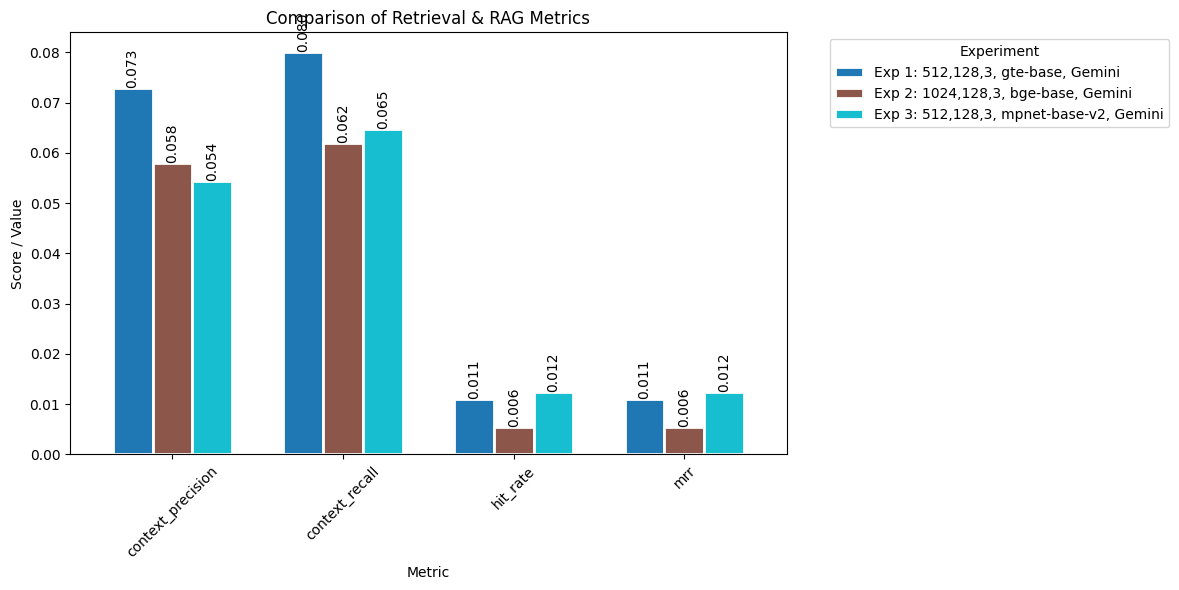

In [ ]:
experiment_names = [
    "Exp 1: 512,128,3, gte-base, Gemini",
    "Exp 2: 1024,128,3, bge-base, Gemini",
    "Exp 3: 512,128,3, mpnet-base-v2, Gemini",

]
metrics_to_plot = ["context_precision", "context_recall", "hit_rate", "mrr"]

plot_experiment_comparison([experiment_1, experiment_2, experiment_3], experiment_names, metrics_to_plot)

### **Experiment 2 - Changing the num docs**



In [ ]:
chunk_size = 512
chunk_overlap = 128
embedding_model_name = "thenlper/gte-base"
num_docs = 3

COLLECTION_NAME = f"experiment_{chunk_size}_{chunk_overlap}_{embedding_model_name.split('/')[1]}"

In [ ]:
# experiment_1 = pd.read_csv(f"{exps_dir}/qdrant_client_memory/experiment_512_128_bge-base-en.csv")

In [ ]:
experiment_1 = run_ragas_eval(eval_df,
                        collection_name=COLLECTION_NAME,
                        doc_retrieval_function=get_documents,
                        num_docs=num_docs,
                        embedding_model_name=embedding_model_name,
                        path=f"{COLLECTION_NAME}_{num_docs}_gemma.csv")


Running Context Retrieve...
Running Oputput Generate...
Running RAGAS evaluation...


Evaluating: 100%|██████████| 1450/1450 [00:01<00:00, 1338.54it/s]


Evaluation completed. Results saved to experiment_512_128_bge-base-en_3_gemma.csv


In [ ]:


chunk_size = 512
chunk_overlap = 128
embedding_model_name = "thenlper/gte-base"
num_docs = 5

COLLECTION_NAME = f"experiment_{chunk_size}_{chunk_overlap}_{embedding_model_name.split('/')[1]}"




In [ ]:
experiment_2 = run_ragas_eval(eval_df,
                        collection_name=COLLECTION_NAME,
                        doc_retrieval_function=get_documents,
                        num_docs=num_docs,
                        embedding_model_name=embedding_model_name,
                        path=f"{COLLECTION_NAME}_{num_docs}_gemma.csv")


Running Context Retrieve...
Running Oputput Generate...
Running RAGAS evaluation...


Evaluating: 100%|██████████| 1450/1450 [00:00<00:00, 1721.77it/s]


Evaluation completed. Results saved to experiment_512_128_bge-base-en_5_gemma.csv


In [ ]:
chunk_size = 512
chunk_overlap = 128
embedding_model_name = "thenlper/gte-base"
num_docs = 7

COLLECTION_NAME = f"experiment_{chunk_size}_{chunk_overlap}_{embedding_model_name.split('/')[1]}"




In [ ]:
experiment_3 = run_ragas_eval(eval_df,
                        collection_name=COLLECTION_NAME,
                        doc_retrieval_function=get_documents,
                        num_docs=num_docs,
                        embedding_model_name=embedding_model_name,
                        path=f"{COLLECTION_NAME}_{num_docs}_gemma.csv")


Running Context Retrieve...
Running Oputput Generate...
Running RAGAS evaluation...


Evaluating: 100%|██████████| 1450/1450 [00:01<00:00, 877.29it/s] 


Evaluation completed. Results saved to experiment_512_128_bge-base-en_7_gemma.csv


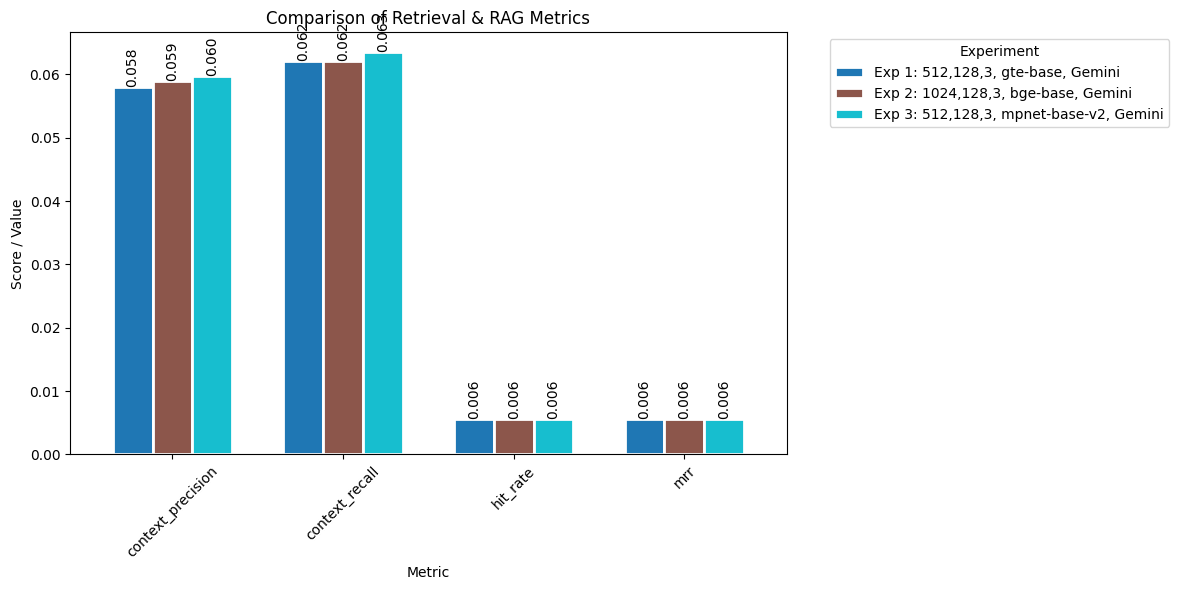

In [ ]:
experiment_names = [
    "Exp 1: 512,128,3, gte-base, Gemini",
    "Exp 2: 1024,128,3, bge-base, Gemini",
    "Exp 3: 512,128,3, mpnet-base-v2, Gemini",

]
metrics_to_plot = ["context_precision", "context_recall", "hit_rate", "mrr"]

plot_experiment_comparison([experiment_1, experiment_2, experiment_3], experiment_names, metrics_to_plot)